## Before start

In [1]:
import torch
print("CUDA Available:", torch.cuda.is_available())
'''You can use prompt nvidia-smi in anaconda command prompt to check CUDA availability and GPU availability'''

CUDA Available: True


'You can use prompt nvidia-smi in anaconda command prompt to check CUDA availability and GPU availability'

## Set up the Environment

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.76  Python-3.10.16 torch-2.6.0.dev20241216+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Setup complete  (20 CPUs, 31.7 GB RAM, 256.5/474.7 GB disk)


In [3]:
# Import Libraries
import torch
import ultralytics
from ultralytics import YOLO

import cv2
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import supervision as sv

# Fix for image loading
import imageio.v2 as imageio
from imageio import imread

from IPython.display import Image as IPyImage

%matplotlib inline

In [4]:
HOME = 'output'
print(HOME)

output


## Play Picture

**NOTE**
*   Play picture is like you want to try a picture to test with pretained model (YOLO - V08).

>> Using the Test My Love Image: temp\kept.png


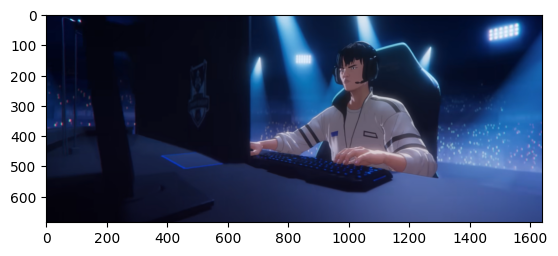

In [5]:
image_path = "temp\kept.png"

print(">> Using the Test My Love Image: {}".format(image_path))
img = imageio.imread(image_path)
plt.imshow(img)

## Helping Function

In [6]:
def showResult(result, img_path):
    # Load image properly
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Error: Could not load image from path {img_path}")
    # Assuming 'result' is a list and you want to access the first element
    result_item = result[0]

    # Now pass the result_item to the Detections object
    detections = sv.Detections.from_ultralytics(result_item)

    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

    annotated_image = img.copy()
    annotated_image = box_annotator.annotate(annotated_image, detections=detections)
    annotated_image = label_annotator.annotate(annotated_image, detections=detections)

    # # Convert image to RGB if it's in BGR format (common in OpenCV)
    # img_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # Plot the image
    sv.plot_image(annotated_image, size=(10, 10))

In [36]:
def mix_result(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Error: Could not load image from {img_path}")

    # Run inference with both models
    original_results = original_model.predict(img_path, conf=0.5)
    custom_results = custom_model.predict(img_path, conf=0.5)

    # Convert YOLO results to Supervision format
    original_detections = sv.Detections.from_ultralytics(original_results[0])
    custom_detections = sv.Detections.from_ultralytics(custom_results[0])

    # Merge detections (you can adjust this logic)
    combined_detections = sv.Detections(
        xyxy=np.concatenate([original_detections.xyxy, custom_detections.xyxy]),
        confidence=np.concatenate([original_detections.confidence, custom_detections.confidence]),
        class_id=np.concatenate([original_detections.class_id, custom_detections.class_id])
    )

    # Annotate image
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

    annotated_image = img.copy()
    annotated_image = box_annotator.annotate(annotated_image, detections=combined_detections)
    annotated_image = label_annotator.annotate(annotated_image, detections=combined_detections)

    # # Convert to RGB and display
    # img_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    sv.plot_image(annotated_image, size=(10, 10))

## YOLOv11 - Pretrained Model

In [7]:
# Define a YOLO model and print the model summary

# Load the model
model = YOLO('yolo11l.pt')

# Model summary
model.info()

YOLO11l summary: 357 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs


(357, 25372160, 0, 87.6134912)

In [8]:
from torchinfo import summary

# Get model summary (like Keras)
summary(model.model, input_size=(10, 3, 640, 640))

Layer (type:depth-idx)                                       Output Shape              Param #
DetectionModel                                               [10, 84, 8400]            --
├─Sequential: 1-1                                            --                        --
│    └─Conv: 2-1                                             [10, 64, 320, 320]        --
│    │    └─Conv2d: 3-1                                      [10, 64, 320, 320]        (1,728)
│    │    └─BatchNorm2d: 3-2                                 [10, 64, 320, 320]        (128)
│    └─Detect: 2-288                                         --                        (recursive)
│    │    └─ModuleList: 3-311                                --                        (recursive)
│    └─Conv: 2-3                                             [10, 128, 160, 160]       --
│    │    └─Conv2d: 3-4                                      [10, 128, 160, 160]       (73,728)
│    │    └─BatchNorm2d: 3-5                                 [1

In [9]:
# Count trainable and non-trainable parameters
trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
non_trainable_params = sum(p.numel() for p in model.model.parameters() if not p.requires_grad)

print(f"Trainable Parameters: {trainable_params:,}")
print(f"Non-Trainable Parameters: {non_trainable_params:,}")

Trainable Parameters: 0
Non-Trainable Parameters: 25,372,160


The reason that all parameters are not trainable, because default of YOLO model is frozen. YOLO model is frozen because YOLO want to speed up prediction for unseen data, by does not need to weight update.
<br>**Important Keyword:**
- Inference is mean the process of using a trained model to make predictions on new, unseen data.

**Example of inference with YOLO**

In [10]:
# SDK (Software Development) prompt
# Input unseen data (Inference) to pretrained model
result = model.predict(image_path, save_dir=f'{HOME}/runs/detect/predict/', save = True)

# Show the result
plt.show(result)


image 1/1 c:\Users\User\Documents\6510451115\DiddyLearning\temp\kept.png: 288x640 1 person, 1 chair, 1 keyboard, 52.0ms
Speed: 1.4ms preprocess, 52.0ms inference, 48.9ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs\detect\predict3


In [11]:
# print(result[0])

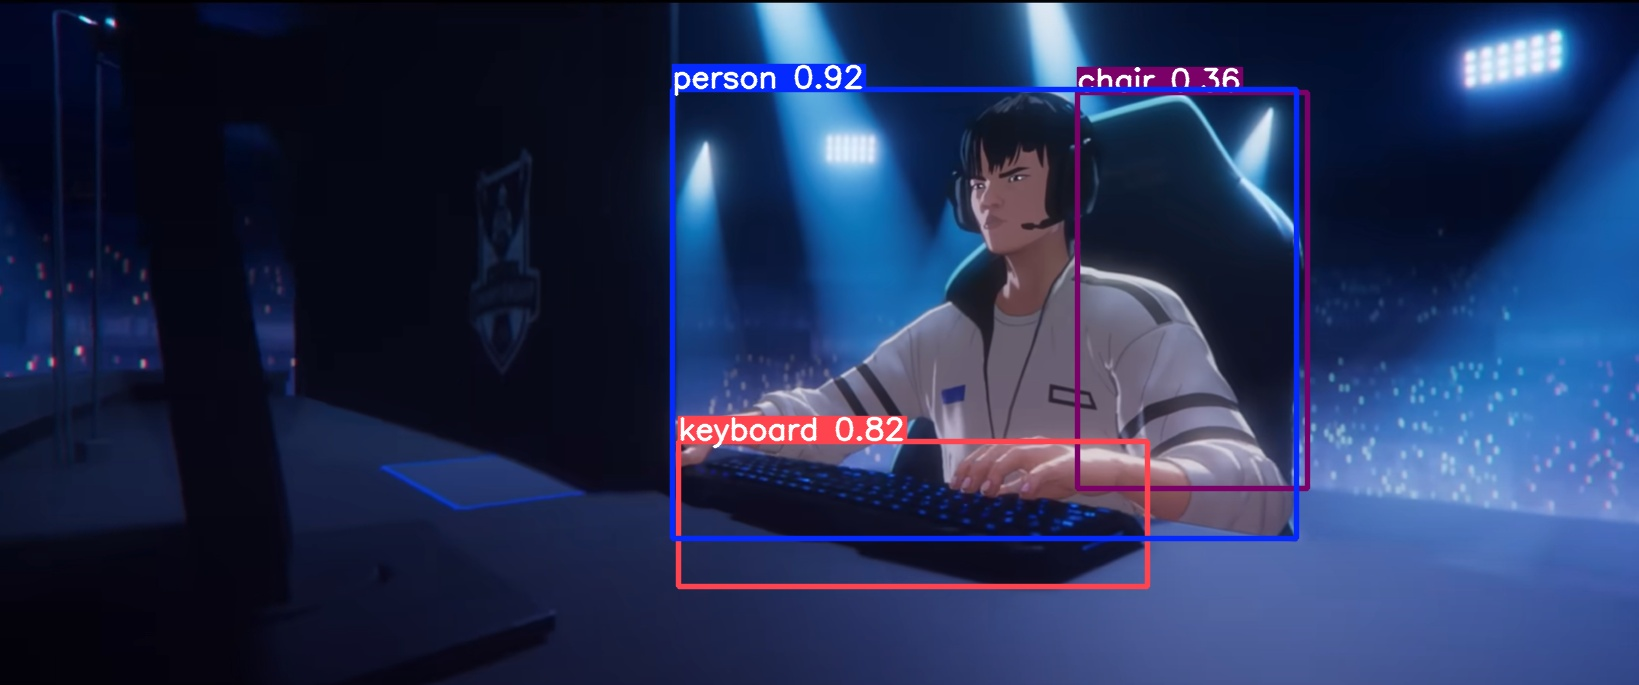

In [12]:
from IPython.display import Image as IPyImage

img = 'runs\detect\predict\kept.jpg'

IPyImage(filename=img, width=600)

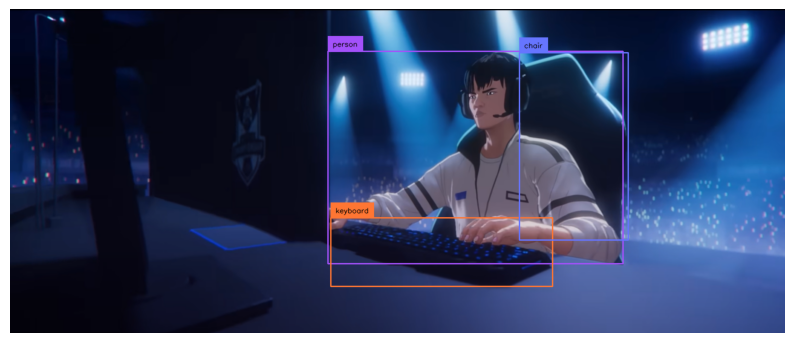

In [13]:
showResult(result, image_path)

## Fine - tune YOLO11 on custom dataset

**Set up dataset path**

In [14]:
# Set up dataset's diverse path
diverse_path = 'dataset\datasetDiverse\data.yaml'

**Train dataset**

In [15]:
# Define a YOLO model and print the model summary
# Train the model
model.train(data=diverse_path, epochs=10, batch=32, imgsz=416, amp=True)

Ultralytics 8.3.76  Python-3.10.16 torch-2.6.0.dev20241216+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)


engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=dataset\datasetDiverse\data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, in

train: Scanning C:\Users\User\Documents\6510451115\DiddyLearning\dataset\datasetDiverse\train\labels.cache... 1449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1449/1449 [00:00<?, ?it/s]
val: Scanning C:\Users\User\Documents\6510451115\DiddyLearning\dataset\datasetDiverse\valid\labels.cache... 138 images, 0 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      9.05G      1.946      2.511      1.976         36        416: 100%|██████████| 46/46 [02:01<00:00,  2.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.39s/it]

                   all        138        334      0.378      0.446      0.311      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.98G      1.501      1.417      1.442         13        416: 100%|██████████| 46/46 [02:13<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.08s/it]

                   all        138        334      0.575       0.73      0.631      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.97G      1.495      1.239      1.417         28        416: 100%|██████████| 46/46 [01:54<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  3.00s/it]

                   all        138        334      0.561      0.744      0.627      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.97G      1.459      1.123      1.413         60        416: 100%|██████████| 46/46 [01:54<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.71s/it]

                   all        138        334      0.695        0.7      0.701      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.97G      1.391       1.09       1.35         21        416: 100%|██████████| 46/46 [01:46<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.77s/it]

                   all        138        334      0.621      0.703      0.678      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.92G      1.332     0.9328      1.289         11        416: 100%|██████████| 46/46 [02:05<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.52s/it]

                   all        138        334       0.77      0.751      0.788      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.99G      1.285     0.8647      1.285          9        416: 100%|██████████| 46/46 [01:57<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.12s/it]

                   all        138        334       0.79      0.756      0.783      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.95G      1.224     0.7566      1.243         13        416: 100%|██████████| 46/46 [01:55<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.57s/it]

                   all        138        334        0.8      0.764      0.817      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.82G      1.191     0.7017      1.216         68        416: 100%|██████████| 46/46 [02:30<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.76s/it]

                   all        138        334      0.655      0.816      0.794      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.95G      1.153      0.642      1.185         25        416: 100%|██████████| 46/46 [01:45<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.75s/it]

                   all        138        334      0.813      0.839      0.856      0.442



10 epochs completed in 0.375 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 51.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 51.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.76  Python-3.10.16 torch-2.6.0.dev20241216+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


                   all        138        334      0.814      0.839      0.856      0.442
                female         93        205      0.863      0.849      0.879      0.429
                  male         57        129      0.764      0.829      0.833      0.455
Speed: 0.2ms preprocess, 4.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023FF22AD7E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

**Evaluate the model**

In [26]:
trained_model = YOLO("runs\\detect\\train4\\weights\\best.pt")  # Load trained model
results = trained_model.predict(img, save=True, conf=0.5)

plt.show(results)


image 1/1 c:\Users\User\Documents\6510451115\DiddyLearning\runs\detect\predict2\Kept.jpg: 192x416 1 male, 39.2ms
Speed: 1.3ms preprocess, 39.2ms inference, 1.1ms postprocess per image at shape (1, 3, 192, 416)
Results saved to runs\detect\predict5


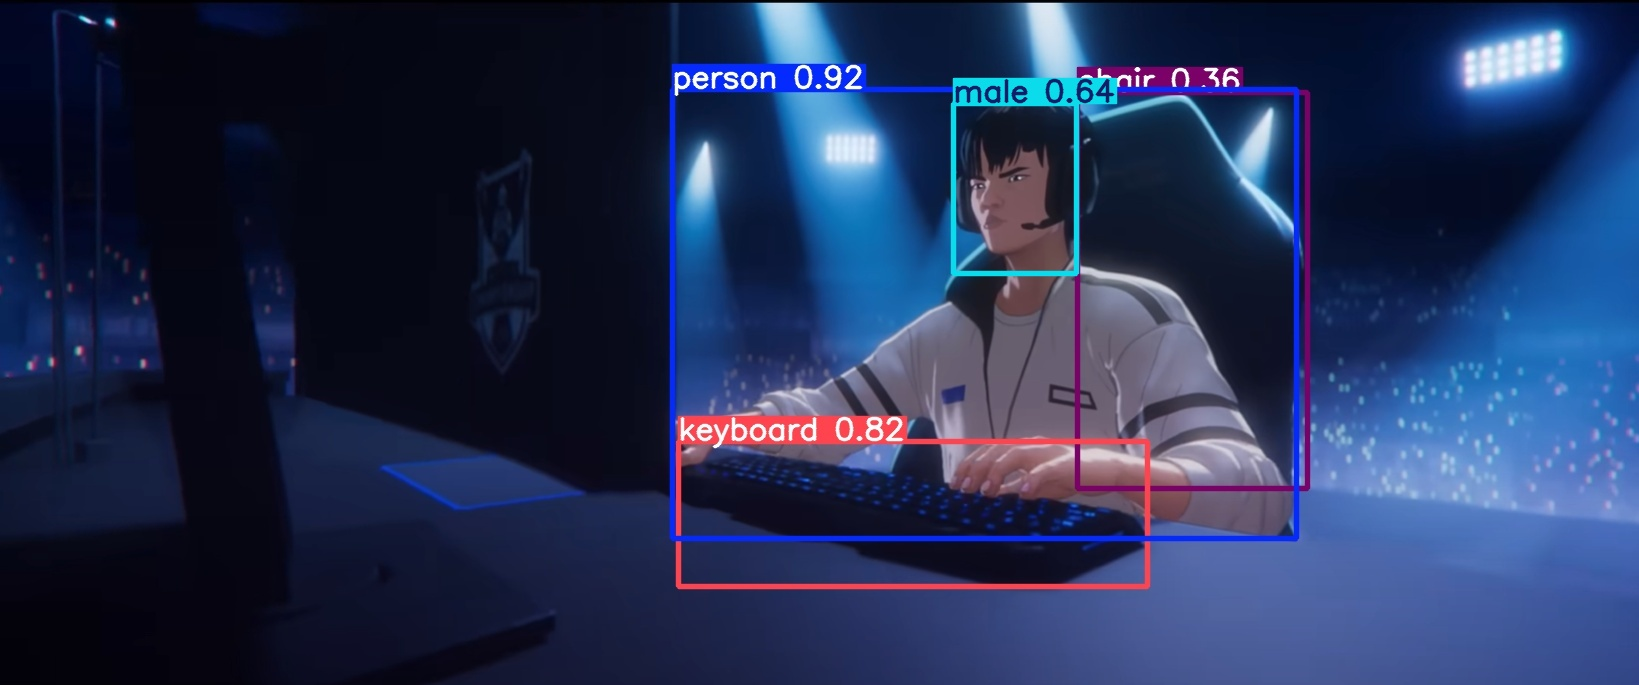

In [27]:
from IPython.display import Image as IPyImage

img = 'runs\detect\predict5\Kept.jpg'

IPyImage(filename=img, width=600)

In [40]:
# Load the original pre-trained YOLO model (COCO dataset)
original_model = YOLO("yolo11l.pt")

# Load your fine-tuned YOLO model
custom_model = YOLO("runs\\detect\\train4\\weights\\best.pt")  # Adjust path if needed


image 1/1 c:\Users\User\Documents\6510451115\DiddyLearning\temp\kept.png: 288x640 1 person, 1 keyboard, 42.6ms
Speed: 4.2ms preprocess, 42.6ms inference, 1.1ms postprocess per image at shape (1, 3, 288, 640)

image 1/1 c:\Users\User\Documents\6510451115\DiddyLearning\temp\kept.png: 192x416 1 male, 17.3ms
Speed: 1.0ms preprocess, 17.3ms inference, 1.3ms postprocess per image at shape (1, 3, 192, 416)


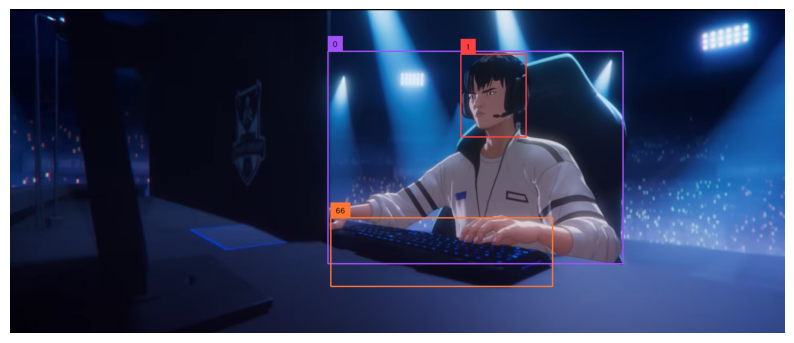

In [41]:
mix_result(image_path)